In [1]:
from utils import load_config, CdsERA5, WindSpeedVisualizer
config = load_config("config.yaml")
query = config["cds_request"]

In [2]:
cds = CdsERA5()
cds.get_data(query=query)
cds.download(filename="test")
wind_speed, ds = cds.process()

2024-06-12 14:39:38.533 | INFO     | utils:__init__:103 - Successfully log to Climate Data Store
2024-06-12 14:39:38,649 INFO Welcome to the CDS
2024-06-12 14:39:38,650 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-06-12 14:39:38,715 INFO Request is completed
2024-06-12 14:39:38,716 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data2/adaptor.mars.internal-1718202811.0071926-3336-15-7507d13b-e0d4-4c47-92da-66bc5cc59a5e.grib to test.grib (114.9M)
2024-06-12 14:39:51,750 INFO Download rate 8.8M/s  
Ignoring index file 'test.grib.9093e.idx' older than GRIB file


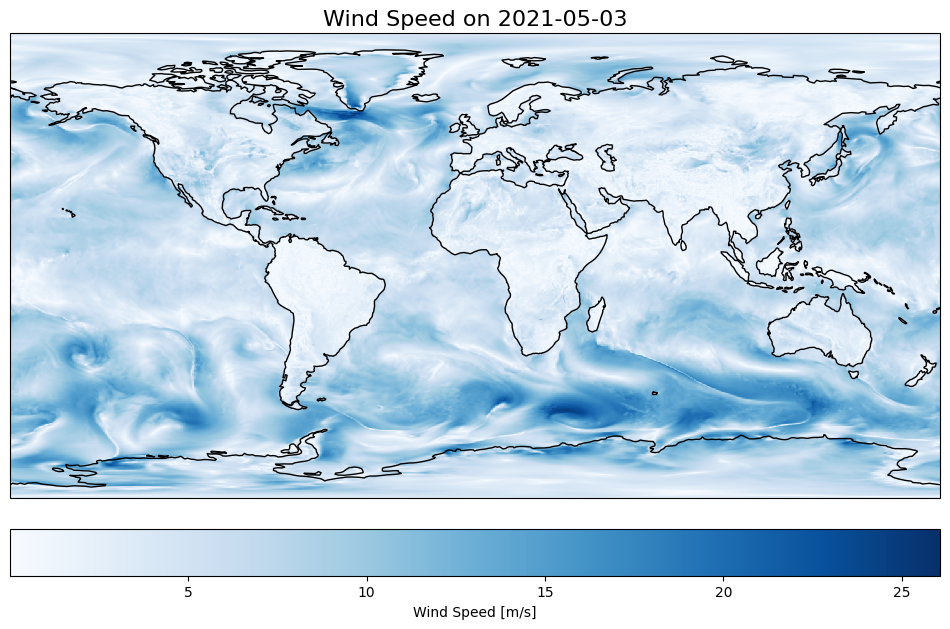

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np


fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
heatmap = ax.pcolormesh(wind_speed.longitude, wind_speed.latitude, wind_speed.sel(time=wind_speed.time[0]),
                        cmap='Blues', transform=ccrs.PlateCarree(), shading='auto')

cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Wind Speed [m/s]')
plt.title(f'Wind Speed on {np.datetime_as_string(wind_speed.time[0].values, unit="D")}', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
wind_anim = WindSpeedVisualizer.generate_animation(wind_speed)

In [7]:
wind_anim